In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import requests

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df_customers = pd.read_csv("archive/olist_customers_dataset.csv",
                           delimiter=',',
                           low_memory=False)
df_geolocation = pd.read_csv("archive/olist_geolocation_dataset.csv",
                             delimiter=',',
                             low_memory=False)
df_order_items = pd.read_csv("archive/olist_order_items_dataset.csv",
                             delimiter=',',
                             low_memory=False)
df_order_payments = pd.read_csv("archive/olist_order_payments_dataset.csv",
                                delimiter=',',
                                low_memory=False)
df_order_reviews = pd.read_csv("archive/olist_order_reviews_dataset.csv",
                               delimiter=',',
                               low_memory=False)
df_orders = pd.read_csv("archive/olist_orders_dataset.csv",
                        delimiter=',',
                        low_memory=False)
df_products = pd.read_csv("archive/olist_products_dataset.csv",
                          delimiter=',',
                          low_memory=False)
df_sellers = pd.read_csv("archive/olist_sellers_dataset.csv",
                         delimiter=',',
                         low_memory=False)
df_product_category_name_translation = pd.read_csv(
    "archive/product_category_name_translation.csv",
    delimiter=',',
    low_memory=False)

## Functions utils

In [293]:
def print_pie_diagram(sizes, labels, colors, title):
    plt.pie(sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

## Analyse exploratoire

In [294]:
nb_orders = df_orders.shape[0]
print(f"Le nombre de commandes est : {nb_orders}")

Le nombre de commandes est : 99441


In [295]:
id_counts = df_customers['customer_unique_id'].value_counts()
nombre_de_clients_uniques = df_customers['customer_unique_id'].nunique()
print(f"Il y a {nombre_de_clients_uniques} clients uniques dans la colonne 'customer_unique_id'.")

Il y a 96096 clients uniques dans la colonne 'customer_unique_id'.


In [296]:
duplicate_ids = id_counts[id_counts > 1]

print(
    f"Nombre de client avec plus de 1 commande: {len(duplicate_ids)}"
)
print(duplicate_ids.shape)

Nombre de client avec plus de 1 commande: 2997
(2997,)


In [297]:
clients_with_2_orders = id_counts[id_counts == 2]

print(
    f"Nombre de client avec 2 commandes: {len(clients_with_2_orders)}"
)
print(clients_with_2_orders.shape)

Nombre de client avec 2 commandes: 2745
(2745,)


In [298]:
clients_with_3_orders = id_counts[id_counts == 3]

print(
    f"Nombre de client avec 3 commandes: {len(clients_with_3_orders)}"
)
print(clients_with_3_orders.shape)

Nombre de client avec 3 commandes: 203
(203,)


In [299]:
client_with_more_orders = id_counts[id_counts > 3]

print(
    f"Nombre de client avec plus de 3 commandes: {len(client_with_more_orders)}"
)
print(client_with_more_orders.shape)

Nombre de client avec plus de 3 commandes: 49
(49,)


### Analyse univariée

#### Nombre de clients par ville

In [300]:
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

#### Les 10 premières villes avec le plus de clients

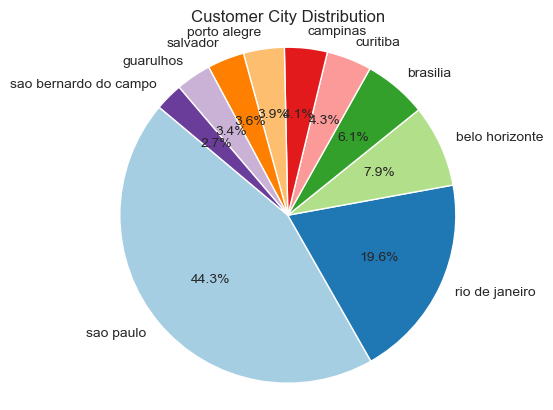

In [301]:
customer_city_count = df_customers['customer_city'].value_counts().head(10)
labels = customer_city_count.index
sizes = customer_city_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='Customer City Distribution')

#### Nombre de clients par état

In [302]:
df_customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

#### Les 10 premiers états avec le plus de clients

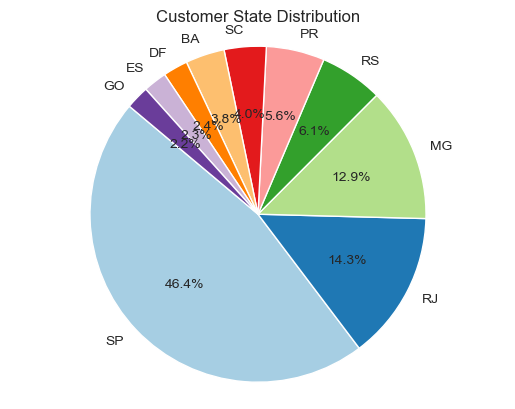

In [303]:
customer_state_count = df_customers['customer_state'].value_counts().head(10)
labels = customer_state_count.index
sizes = customer_state_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='Customer State Distribution')

#### Les 10 premières villes avec le plus de vendeurs

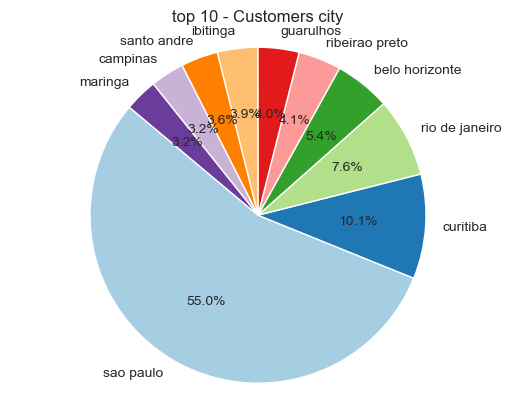

In [304]:
seller_city_count = df_sellers['seller_city'].value_counts().head(10)
labels = seller_city_count.index
sizes = seller_city_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='top 10 - Customers city')

#### Les 10 premiers états avec le plus de vendeurs

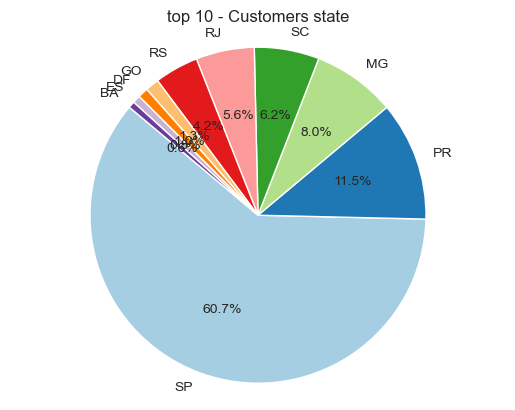

In [305]:
seller_state_count = df_sellers['seller_state'].value_counts().head(10)
labels = seller_state_count.index
sizes = seller_state_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='top 10 - Customers state')

#### Nombre de produits par commande

In [306]:
item_count_per_order = df_order_items.groupby('order_id').size()
total_orders = len(item_count_per_order)
item_count_per_order = item_count_per_order.value_counts()
print(item_count_per_order)

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
dtype: int64


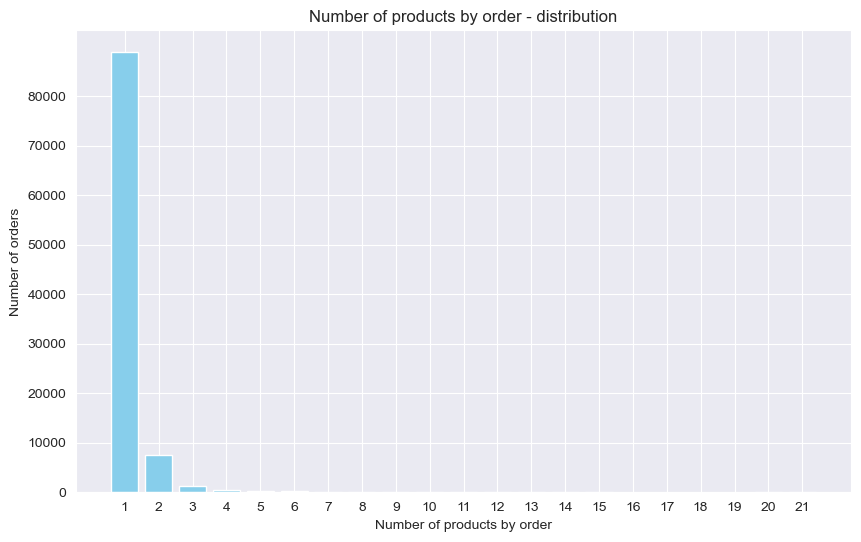

In [307]:
plt.figure(figsize=(10, 6))
bar_width = 0.8 
plt.bar(item_count_per_order.index, item_count_per_order.values, width=bar_width, color='skyblue')
plt.xlabel('Number of products by order')
plt.ylabel('Number of orders')
plt.title('Number of products by order - distribution')

plt.xticks(range(1, item_count_per_order.index.max() + 1))
plt.yticks(range(0, item_count_per_order.max(), 10000))
plt.show()

#### Type de paiement

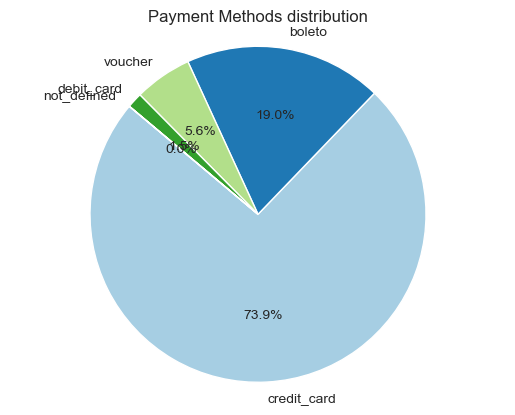

In [308]:
order_payments_count = df_order_payments['payment_type'].value_counts()
labels = order_payments_count.index
sizes = order_payments_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='Payment Methods distribution')

#### Reviews

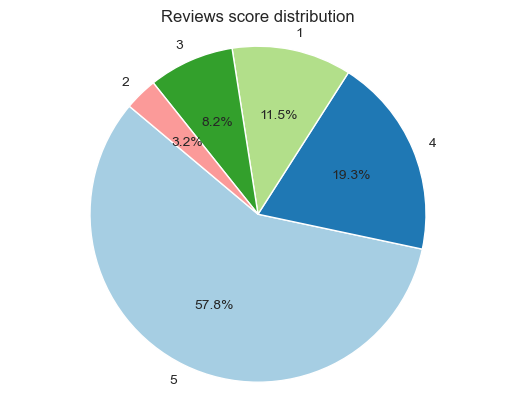

In [309]:
order_reviews_count = df_order_reviews['review_score'].value_counts()
labels = order_reviews_count.index
sizes = order_reviews_count.values
colors = plt.cm.Paired(range(len(labels)))
print_pie_diagram(sizes, labels=labels, colors=colors, title='Reviews score distribution')

#### Analyse des commandes

In [310]:
total_orders = len(df_orders)
print(total_orders)

99441


#### Nombre de commandes par status 

delivered: 96478 commandes (97.02%)
shipped: 1107 commandes (1.11%)
canceled: 625 commandes (0.63%)
unavailable: 609 commandes (0.61%)
invoiced: 314 commandes (0.32%)
processing: 301 commandes (0.30%)
created: 5 commandes (0.01%)
approved: 2 commandes (0.00%)


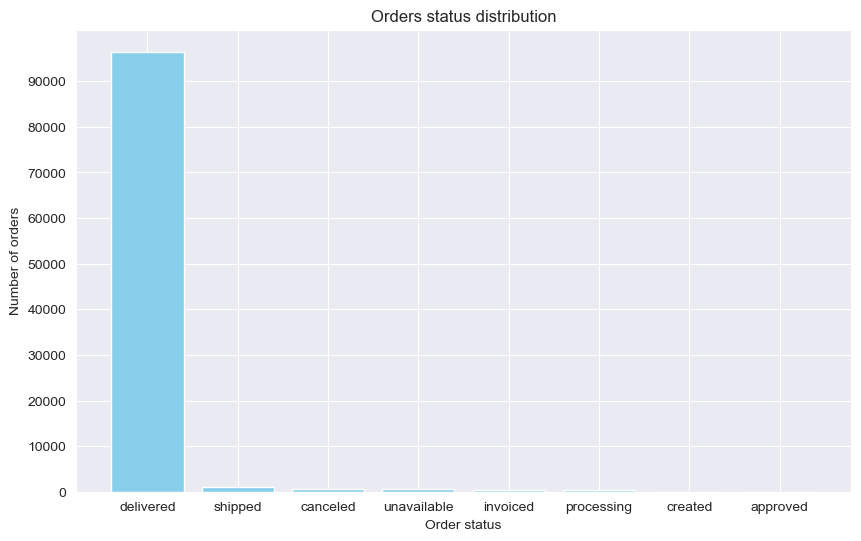

In [311]:
orders_count = df_orders['order_status'].value_counts()
percentages = (orders_count / total_orders) * 100

for label, count, percent in zip(orders_count.index, orders_count.values, percentages.values):
    count_str = str(count)
    print(f"{label}: {count_str} commandes ({percent:.2f}%)")


plt.figure(figsize=(10, 6))
bar_width = 0.8
bar_positions = range(1, len(orders_count) + 1)
plt.bar(bar_positions, orders_count.values, width=bar_width, color='skyblue')
plt.xlabel('Order status')
plt.ylabel('Number of orders')
plt.title('Orders status distribution')

plt.xticks(bar_positions, orders_count.index)
plt.yticks(range(0, orders_count.max(), 10000))
plt.show()

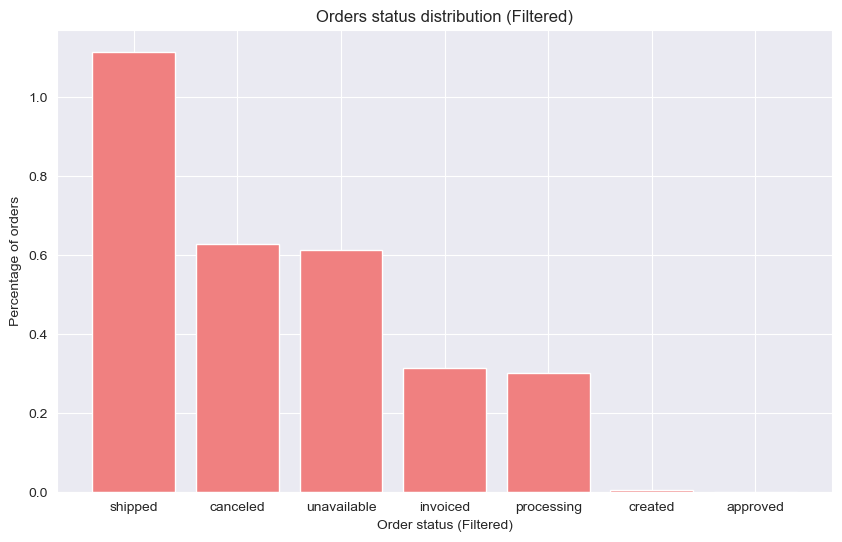

In [312]:
filtered_percentages = percentages[percentages < 2]
plt.figure(figsize=(10, 6))
bar_width_filtered = 0.8
bar_positions_filtered = range(1, len(filtered_percentages) + 1)
plt.bar(bar_positions_filtered, filtered_percentages.values, width=bar_width_filtered, color='lightcoral')
plt.xlabel('Order status (Filtered)')
plt.ylabel('Percentage of orders')
plt.title('Orders status distribution (Filtered)')
plt.xticks(bar_positions_filtered, filtered_percentages.index)
plt.show()

#### Analyse des catégories de produits

In [313]:
df_merged = pd.merge(df_products,
                     df_product_category_name_translation,
                     on='product_category_name',
                     how='left')

products_count = df_merged['product_category_name_english'].value_counts()
percentages = (products_count / len(df_merged)) * 100

for label, count, percent in zip(products_count.index, products_count.values,
                                 percentages.values):
    print(f"{label}: {count} occurences ({percent:.2f}%)")

bed_bath_table: 3029 occurences (9.19%)
sports_leisure: 2867 occurences (8.70%)
furniture_decor: 2657 occurences (8.06%)
health_beauty: 2444 occurences (7.42%)
housewares: 2335 occurences (7.09%)
auto: 1900 occurences (5.77%)
computers_accessories: 1639 occurences (4.97%)
toys: 1411 occurences (4.28%)
watches_gifts: 1329 occurences (4.03%)
telephony: 1134 occurences (3.44%)
baby: 919 occurences (2.79%)
perfumery: 868 occurences (2.63%)
fashion_bags_accessories: 849 occurences (2.58%)
stationery: 849 occurences (2.58%)
cool_stuff: 789 occurences (2.39%)
garden_tools: 753 occurences (2.29%)
pet_shop: 719 occurences (2.18%)
electronics: 517 occurences (1.57%)
construction_tools_construction: 400 occurences (1.21%)
home_appliances: 370 occurences (1.12%)
luggage_accessories: 349 occurences (1.06%)
consoles_games: 317 occurences (0.96%)
office_furniture: 309 occurences (0.94%)
musical_instruments: 289 occurences (0.88%)
small_appliances: 231 occurences (0.70%)
home_construction: 225 occuren

## Nettoyage des données

### Garder seulement la review la plus récente pour chaque commande (supression des doublons)

In [314]:
df_order_reviews_cleaned = df_order_reviews.copy()
df_order_reviews_cleaned['review_answer_timestamp'] = pd.to_datetime(
    df_order_reviews_cleaned['review_answer_timestamp'])
df_order_reviews_cleaned = df_order_reviews_cleaned.sort_values(
    by='review_answer_timestamp', ascending=False)
df_order_reviews_cleaned = df_order_reviews_cleaned.drop_duplicates(
    subset='order_id', keep='first')
df_order_reviews_cleaned.to_csv('result_order_reviews.csv', index=False)

### Garder 1 seul produit par commande, et ajouter l'information nombre de produits et le prix moyen par produit (sans réduction)

In [315]:
nb_of_items = df_order_items.groupby('order_id').size().reset_index(
    name='nb_of_items')
df_order_items[
    'total_price'] = df_order_items['price'] + df_order_items['freight_value']
total_price_per_order = df_order_items.groupby(
    'order_id')['total_price'].sum().reset_index(name='total_price_per_order')
df_order_items_cleaned = pd.merge(nb_of_items,
                                  total_price_per_order,
                                  on='order_id',
                                  how='left')
df_order_items_cleaned['average_price'] = df_order_items_cleaned[
    'total_price_per_order'] / df_order_items_cleaned['nb_of_items']
df_order_items_cleaned.to_csv('result_orders_items.csv', index=False)

### Simplifier la table des paiements tout en gardant l’information du nombre de paiements effectués par le client et ses modes de paiements (Ajout de colonne nb_payment_installments + One-hot encoding).

In [316]:
df_order_payments = df_order_payments.loc[
    df_order_payments['payment_type'] != 'not_defined']

nb_payment_installments = df_order_payments.groupby(
    'order_id').size().reset_index(name='nb_payment_installments')

payment_type_dummies = pd.get_dummies(df_order_payments['payment_type'],
                                      prefix='payment_type')
df = pd.concat([df_order_payments, payment_type_dummies], axis=1)

aggregated_data = df.groupby('order_id')[
    payment_type_dummies.columns].sum().reset_index()

df_order_payments_cleaned = pd.merge(nb_payment_installments,
                                     aggregated_data,
                                     on='order_id',
                                     how='inner')

df_order_payments_cleaned.to_csv('result_order_payments.csv', index=False)

### Analyse bivariée

In [317]:
full_df = pd.merge(df_order_payments_cleaned, df_orders, on='order_id')
full_df = pd.merge(df_customers, full_df, on='customer_id')
full_df = pd.merge(df_order_reviews_cleaned, full_df, on='order_id')
full_df = pd.merge(df_order_items_cleaned, full_df, on='order_id')
full_df.to_csv('result_merged.csv', index=False)

#### Nombre de commandes par client

In [318]:
orders_per_customer = full_df['customer_unique_id'].value_counts()
customers_per_order_count = orders_per_customer.value_counts()
percentages = (customers_per_order_count / total_orders) * 100

for label, count, percent in zip(customers_per_order_count.index,
                                 customers_per_order_count.values,
                                 percentages.values):
    print(f"{label}: {count} commandes ({percent:.2f}%)")

1: 91851 commandes (92.37%)
2: 2635 commandes (2.65%)
3: 186 commandes (0.19%)
4: 29 commandes (0.03%)
5: 9 commandes (0.01%)
6: 5 commandes (0.01%)
7: 3 commandes (0.00%)
16: 1 commandes (0.00%)
9: 1 commandes (0.00%)


In [319]:
# Trouver les customer_unique_id qui apparaissent plus d'une fois
duplicate_ids = full_df[full_df.duplicated(subset='customer_unique_id', keep=False)]

# Afficher les customer_unique_id qui sont en double
print(duplicate_ids['customer_unique_id'])

1        eb28e67c4c0b83846050ddfb8a35d051
35       98758d88bf4b8eef1372ddee45d63178
48       87ae4c644c15d9c6b6f826dfec33b340
83       d56ded4569dd9821b2f83710a56afbde
91       3725c5b8c1cf5ee69158f66922a862c4
                       ...               
97798    acc4424c209233de519e034152f30304
97808    c130bf40aa6d3bdb444b04a8d78adf5a
97874    71d2dbb6d2f52d568ca9d69c815a4331
97889    4e15fee963523774998876e3624952f4
97900    2b19910e856b2ba3e7257e63a093a3df
Name: customer_unique_id, Length: 6065, dtype: object


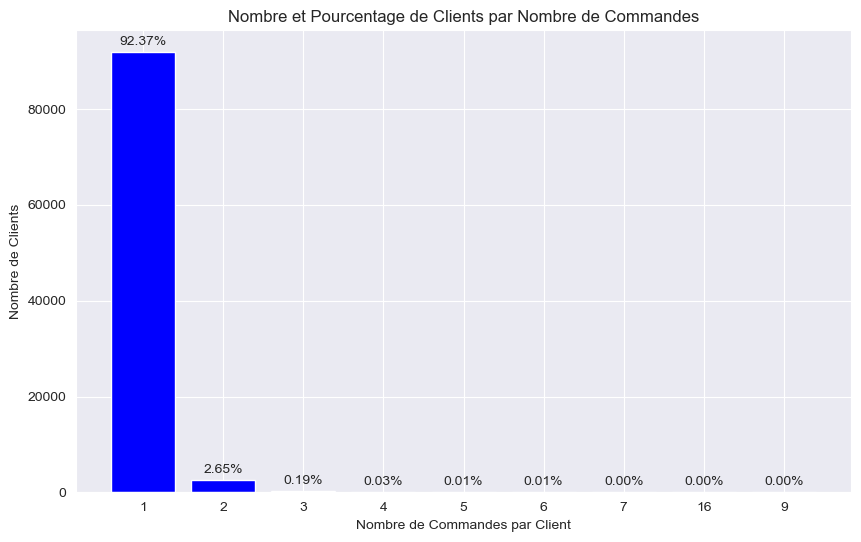

In [320]:
sorted_data = sorted(zip(customers_per_order_count.index, customers_per_order_count.values, percentages),key=lambda x: x[1], reverse=True)
labels, counts, percentages = zip(*sorted_data)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar([str(label) for label in labels], counts, color='blue')
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(f'{percent:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.title("Nombre et Pourcentage de Clients par Nombre de Commandes")
plt.xlabel("Nombre de Commandes par Client")
plt.ylabel("Nombre de Clients")
plt.show()

In [321]:
duplicates = full_df['customer_unique_id'].duplicated()
num_duplicates = duplicates.sum()
duplicate_rows = full_df[full_df['customer_unique_id'].duplicated(
    keep=False)]

print(duplicate_rows)

                               order_id  nb_of_items  total_price_per_order  \
1      00018f77f2f0320c557190d7a144bdd3            1                 259.83   
35     0017afd5076e074a48f1f1a4c7bac9c5            1                 853.39   
48     0020a222f55eb79a372d0efee3cca688            1                  45.09   
83     0035246a40f520710769010f752e7507            1                  99.11   
91     003a7f59d7e08a9c61d9e2881fe6459c            1                 134.28   
...                                 ...          ...                    ...   
97798  ffabaa69e709f1ec58faf2f706c8c8ee            1                 161.86   
97808  ffb47bf24e3f64dc0a2059a9181b976a            1                  56.24   
97874  ffe49171e120186dcc4c444b55691810            1                  76.85   
97889  ffee31fb4b5e35c9123608015637c495            1                 112.52   
97900  fff6889749958e42b47a7977a4cf0ea0            1                 123.60   

       average_price                         review

In [322]:
# Trouver les order_id qui ont des seller_id différents
def has_multiple_sellers(seller_ids):
    return len(set(seller_ids)) > 1


grouped = df_order_items.groupby('order_id')['seller_id'].agg(
    has_multiple_sellers).reset_index()
orders_with_multiple_sellers = grouped[grouped['seller_id'] == True]

# Afficher les résultats
if not orders_with_multiple_sellers.empty:
    print("Orders avec des vendeurs multiples:")
    print(orders_with_multiple_sellers['order_id'])
else:
    print("Aucun order avec des vendeurs multiples.")

Orders avec des vendeurs multiples:
73       002f98c0f7efd42638ed6100ca699b42
268      00bcee890eba57a9767c7b5ca12d3a1b
411      01144cadcf64b6427f0a6580a3033220
473      013a98b3a668bcef05b98898177f6923
485      014405982914c2cde2796ddcf0b8703d
                       ...               
98251    feded510efe2a76dd134d8533af626f9
98268    feea1134dca132388da564d8f026a2ca
98308    ff00a56fe9475a175cd651d77c707a09
98368    ff2a353ee8dfd97ba95c73cca4ed2636
98563    ffb8f7de8940249a3221252818937ecb
Name: order_id, Length: 1278, dtype: object


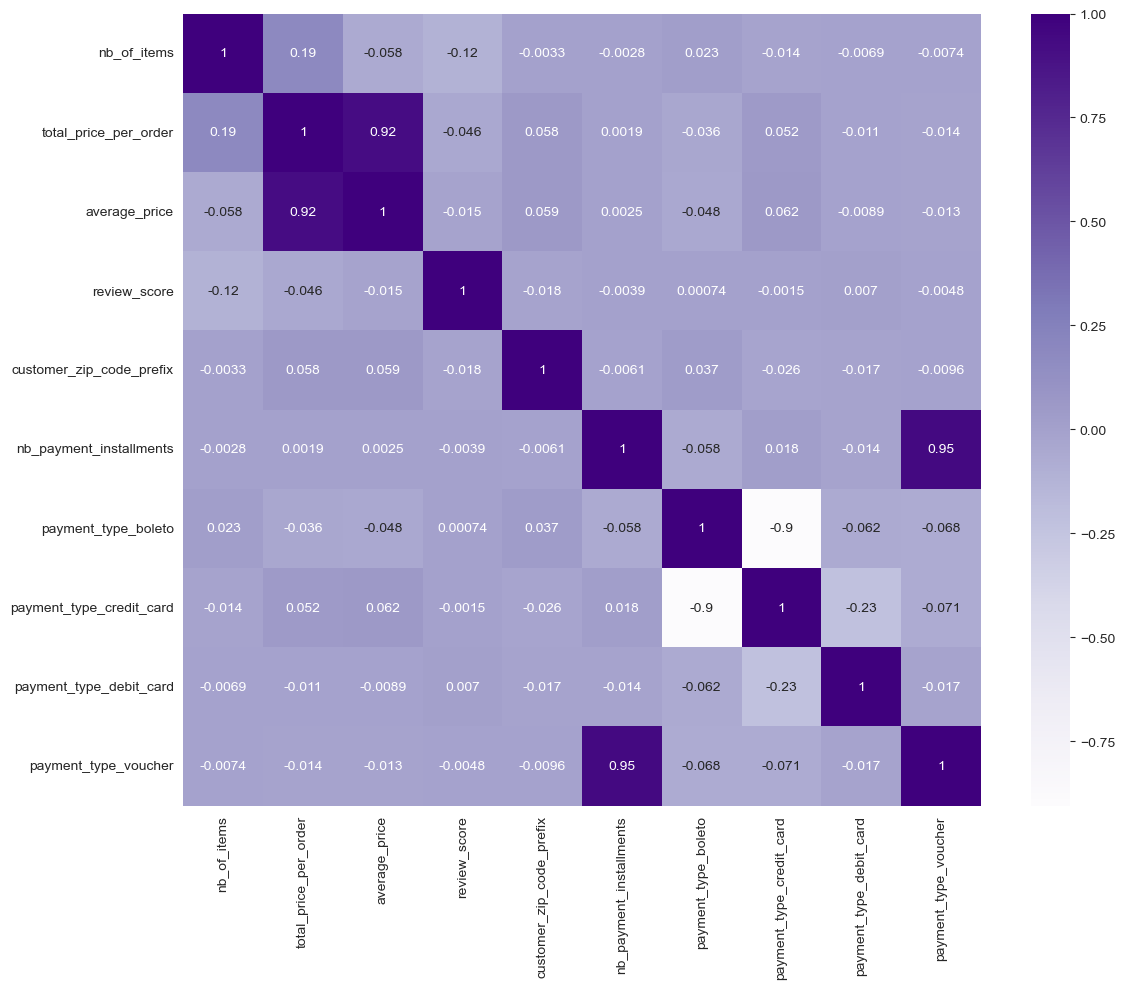

In [323]:
numeric_columns = full_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples")
plt.tight_layout()
plt.savefig('pearson_heatmap.png', dpi=300)

In [327]:
full_df['customer_zip_code_prefix'] = full_df[
    'customer_zip_code_prefix'].astype(str).str.slice(0, 2)
full_df['customer_zip_code_prefix'] = full_df[
    'customer_zip_code_prefix'].astype(str).str.slice(0, 2).astype(int)

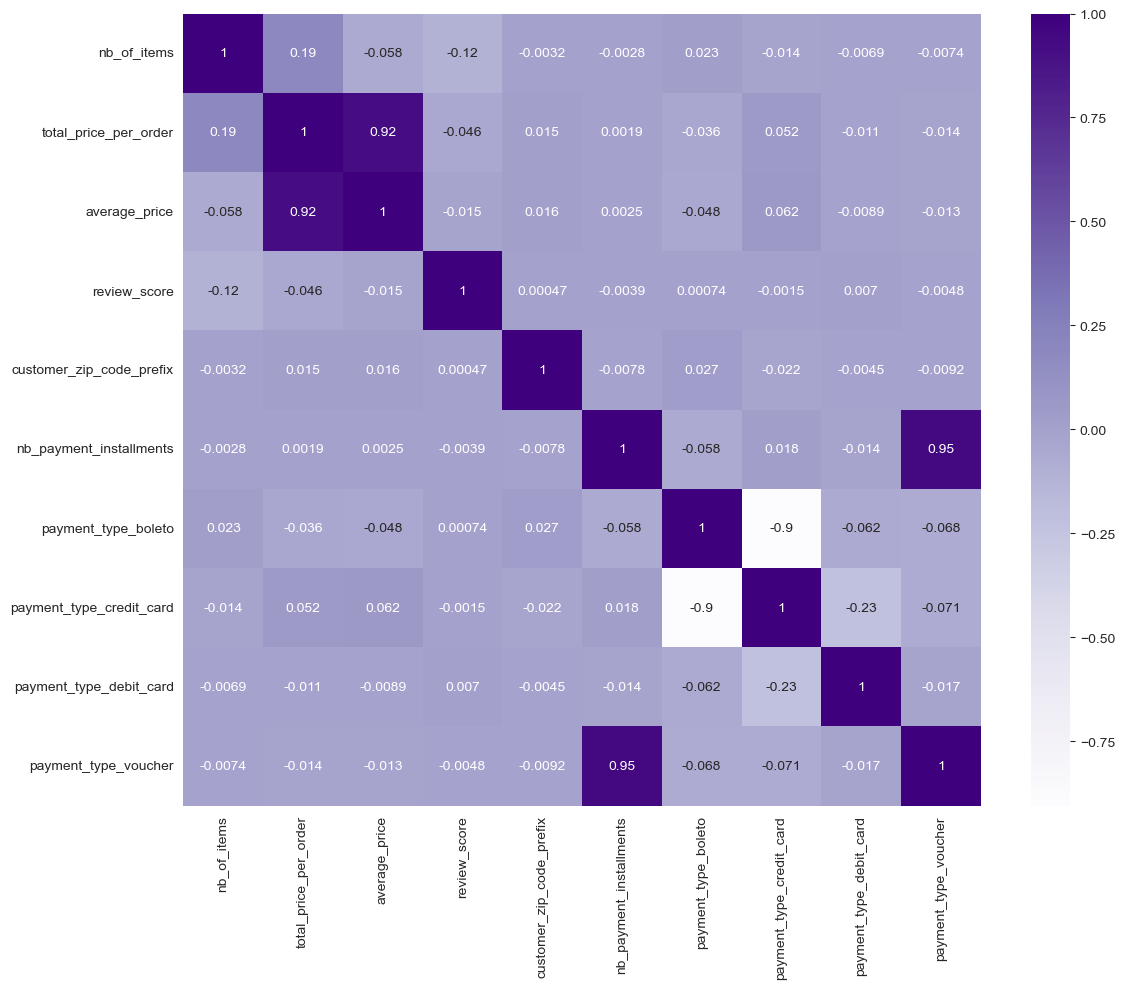

In [328]:
numeric_columns = full_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples")
plt.tight_layout()
plt.savefig('pearson_heatmap.png', dpi=300)